In [67]:
from sklearn import datasets

In [68]:
iris = datasets.load_iris()
# iris

In [69]:
from IPython.display import Image
Image(url = 'https://www.tensorflow.org/images/iris_three_species.jpg')

In [70]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [71]:
# input features
features = iris.data
# target
target = iris.target

In [72]:
# name of target in iris dataset
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [73]:
# size of target
print(iris.target.shape)

(150,)


In [74]:
import pandas as pd
import numpy as np

# converting dataset into Dataframe for getting some helpful functionality
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [75]:
# count of each species
df.Species.value_counts()

Species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'Species'}>, <Axes: >]], dtype=object)

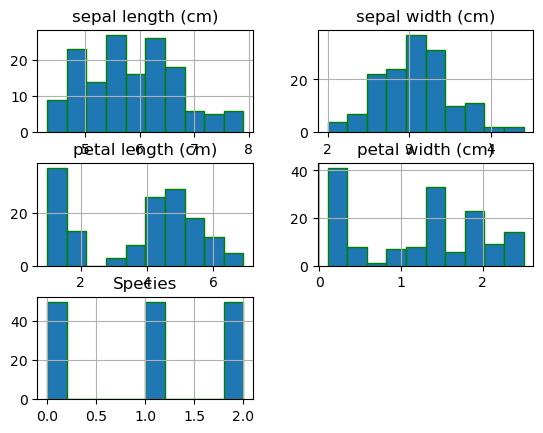

In [76]:
import matplotlib.pyplot as plt

# plot iris  features histogram
df.hist(edgecolor = 'green', linewidth = 1)

<Axes: >

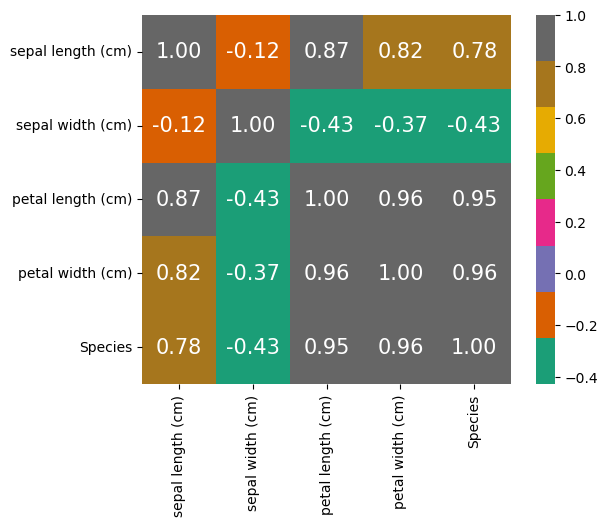

In [77]:
import seaborn as sns

# feature correlation
sns.heatmap(df.corr(),cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap='Dark2')


In [78]:
# split sata to train and test sets
from sklearn.model_selection import train_test_split, GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)


In [79]:
# train the regression model
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)


/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
# predict on the test set
y_pred = regressor.predict(X_test)

In [81]:
# evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

reg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = ", reg_accuracy)
reg_report = classification_report(y_test, y_pred)
print(reg_report)
reg_confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(reg_confusion)

Accuracy =  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [82]:
# hyperparamet tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300]
}

# initialize grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='accuracy')

# train model
grid_search.fit(X_train, y_train)

# get the best parameters and model
best_param = grid_search.best_params_
best_model = grid_search.best_estimator_


/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/sit

In [83]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Best Hyperparameters: {best_param}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.83      0.91        18
           2       0.79      1.00      0.88        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45

Confusion Matrix:
[[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]


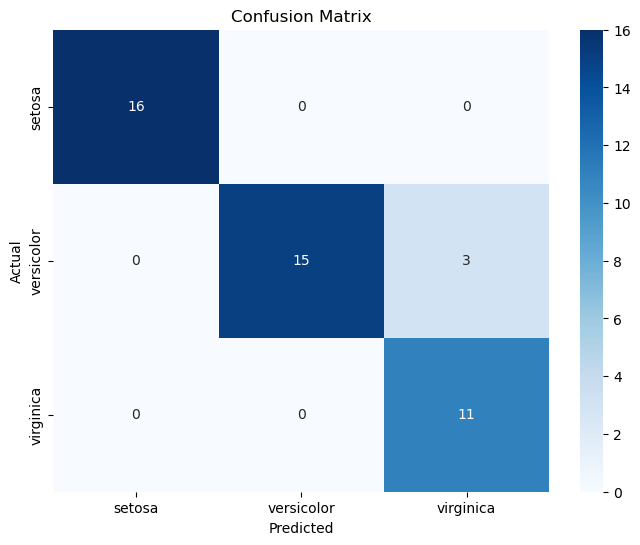

In [84]:
# Plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

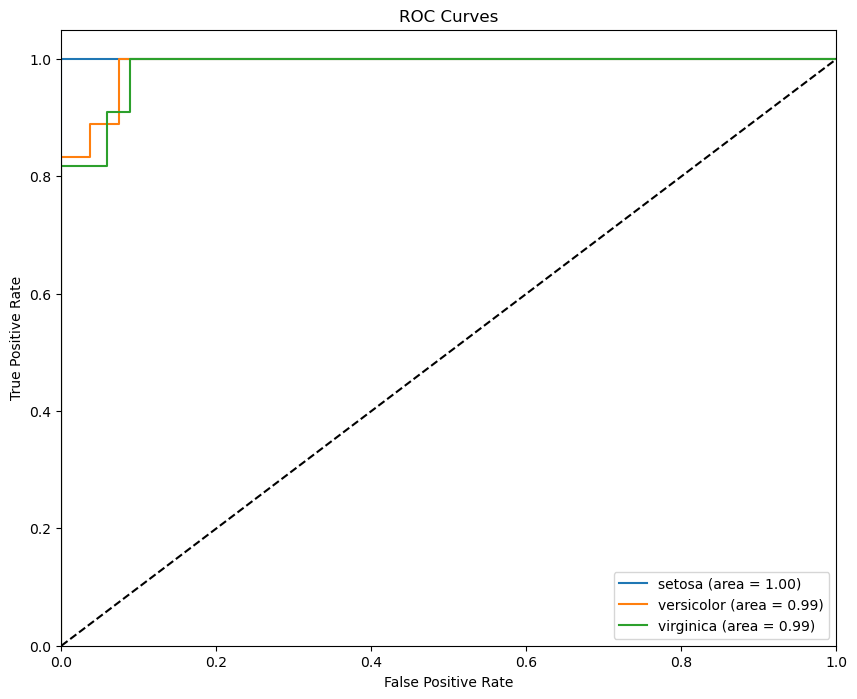

In [85]:
# Plot ROC curves
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = best_model.predict_proba(X_test)

plt.figure(figsize=(10, 8))
for i in range(len(iris.target_names)):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'{iris.target_names[i]} (area = {roc_auc_score(y_test == i, y_pred_proba[:, i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


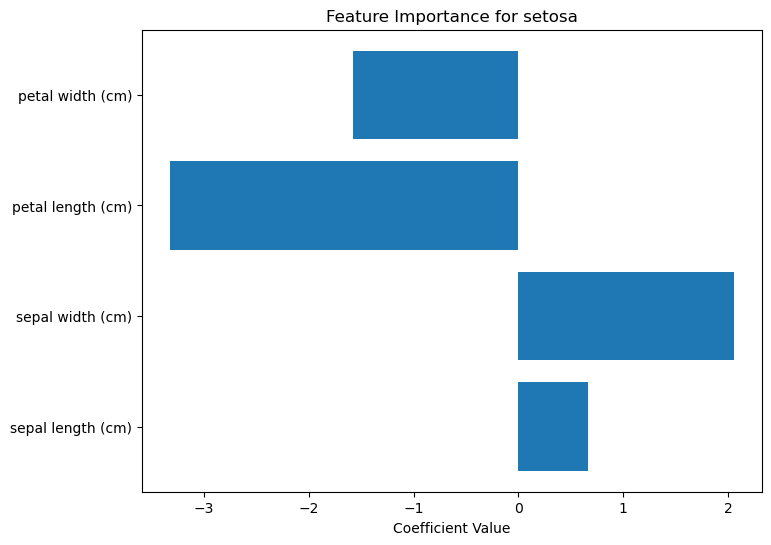

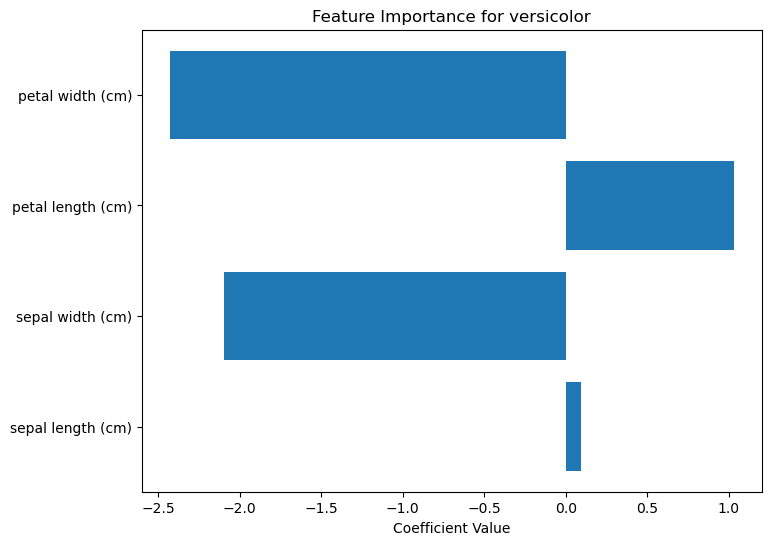

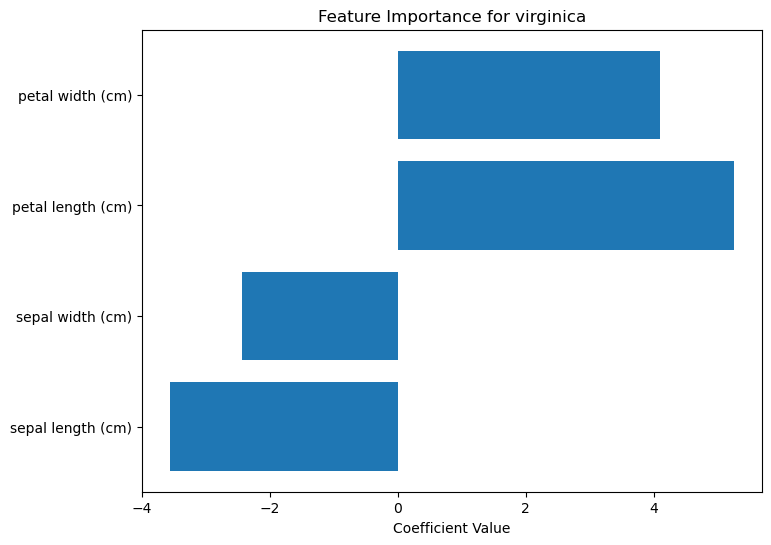

In [86]:
# Feature importance (coefficients)

feature_importance = best_model.coef_
for i in range(len(iris.target_names)):
    plt.figure(figsize=(8, 6))
    plt.barh(iris.feature_names, feature_importance[i])
    plt.xlabel('Coefficient Value')
    plt.title(f'Feature Importance for {iris.target_names[i]}')
    plt.show()